In [1]:
import json
from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
from torch import nn

# Load ViT
from pytorch_pretrained_vit import ViT

model = ViT('B_16_imagenet1k', pretrained=True)
model.eval()

def get_embedding(filename):
    # Load image
    # NOTE: Assumes an image `img.jpg` exists in the current directory
    img = transforms.Compose([
        transforms.Resize((384, 384)), 
        transforms.ToTensor(),
        transforms.Normalize(0.5, 0.5),
    ])(Image.open(filename).convert("RGB")).unsqueeze(0)
#     print(img.shape) # torch.Size([1, 3, 384, 384])

    # Classify
    with torch.no_grad():
        outputs = model(img)
#     print("Check shape", outputs.shape)  # (1, 1000)
#     print(img.max(), img.min())
    return outputs, Image.open(filename).convert("RGB")

def cos_similarity(filename1, filename2, name1='Ref', name2='Cand'):
    input1, img1 = get_embedding(filename1)
    input2, img2 = get_embedding(filename2)
    sim = nn.CosineSimilarity(dim=1, eps=1e-6)(input1, input2)
    
    # display image
    plt.figure(figsize=(12,5))
    
    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    plt.imshow(img1)
    plt.title(name1)

    plt.subplot(1, 2, 2) # index 2
    plt.imshow(img2)
    plt.title(name2)
    
    plt.suptitle("Similarity (range [-1, 1]): {}".format(sim.item()), fontsize=14)
    plt.show()

def check_sim(ref, list_, ref_name='From Live'):
    for filename in list_:
        cos_similarity(ref, filename, name1=ref_name, name2=list_[filename])

Loaded pretrained weights.


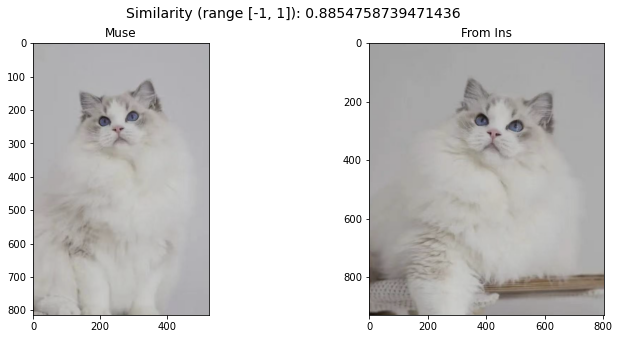

In [6]:
cos_similarity('muse.png', 'ins_him.png', name1='Muse', name2='From Ins')

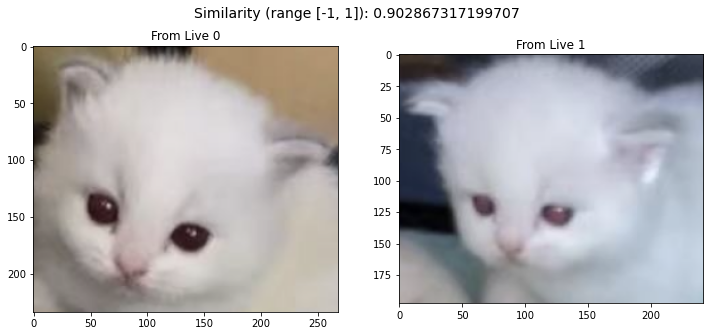

In [21]:
cos_similarity('ref.png', 'ref1.png', name1='From Live 0', name2='From Live 1')

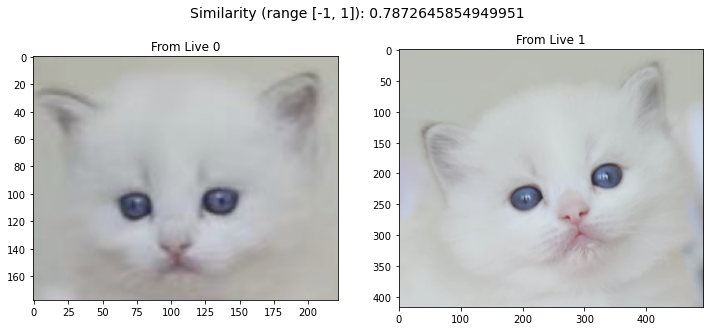

In [10]:
cos_similarity('girl1.png', 'girl2.png', name1='From Live 0', name2='From Live 1')

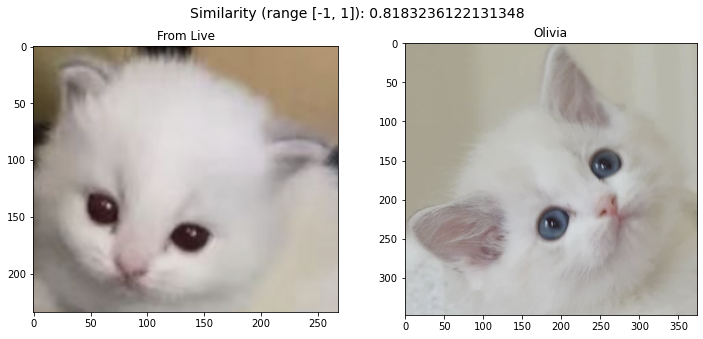

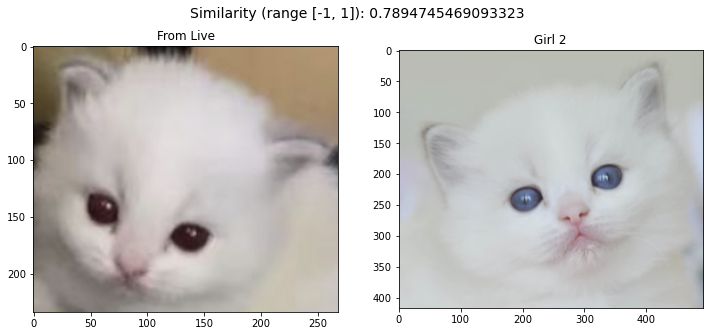

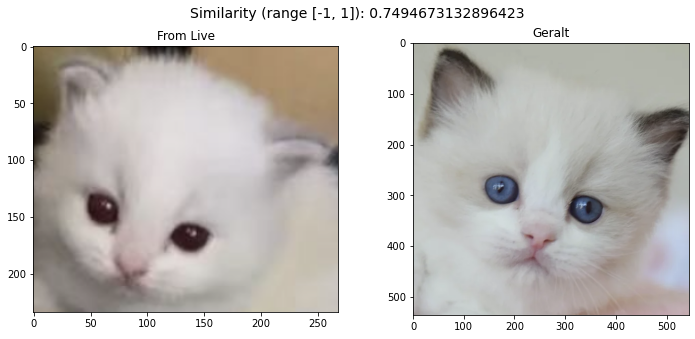

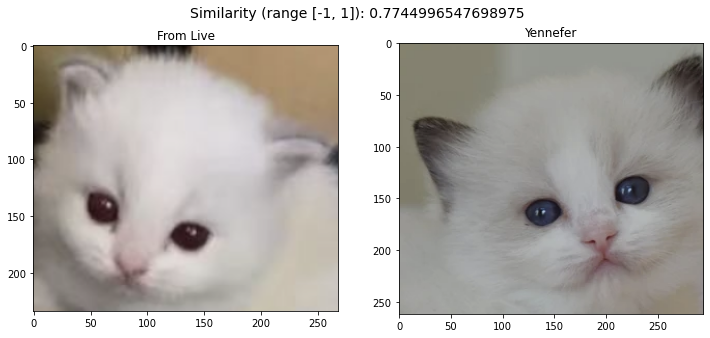

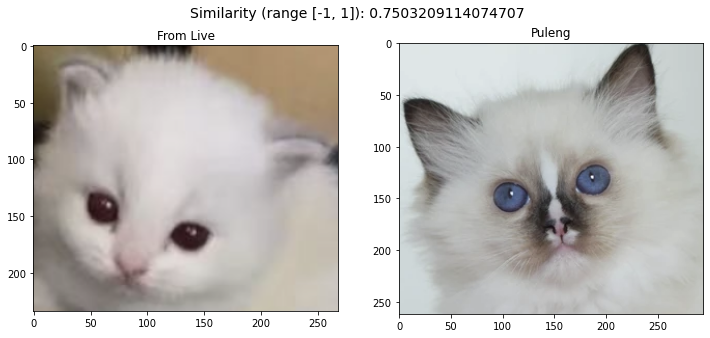

In [17]:
REF = 'ref.png'
compare_list = {
    'olivia1.png': "Olivia",
    'girl2.png': 'Girl 2',
    'adv_sample0.png': 'Geralt',
    'adv_sample1.png': 'Yennefer', 
    'adv_sample2.png': 'Puleng'
} =

check_sim(REF, compare_list, ref_name='From Live')

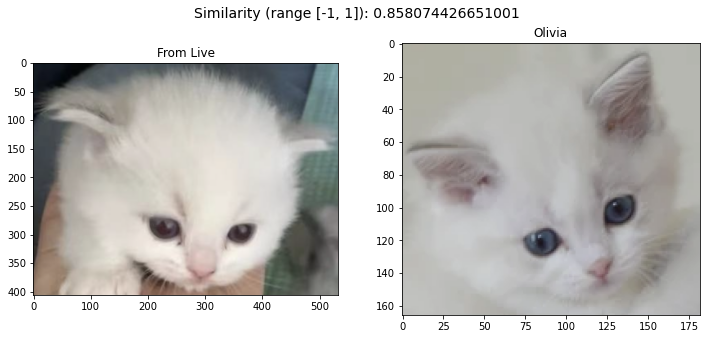

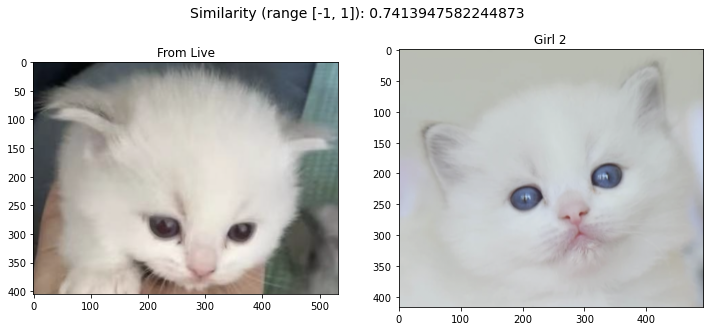

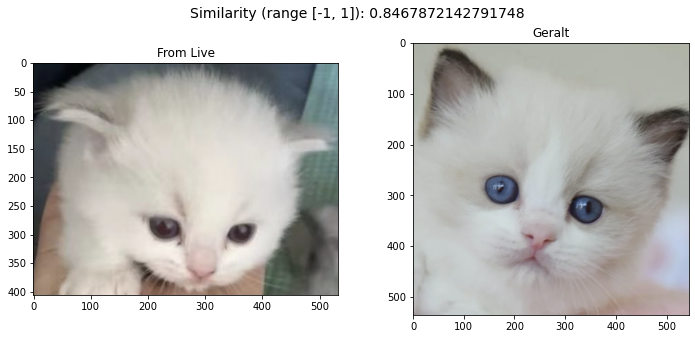

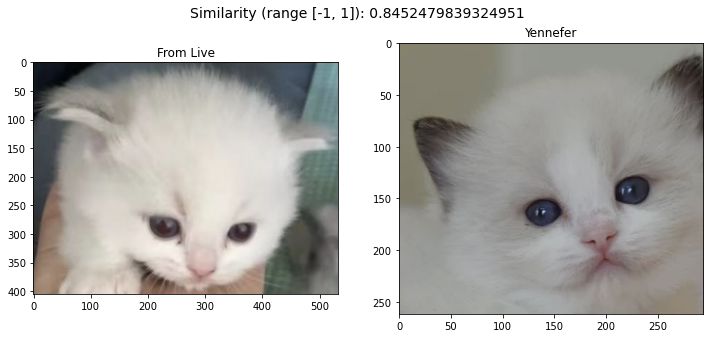

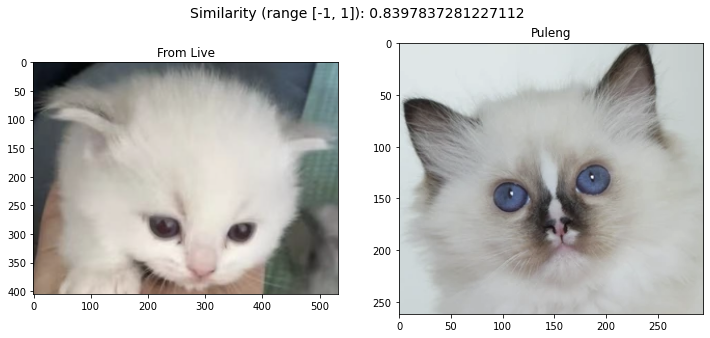

In [18]:
REF = 'ref2.png'
compare_list = {
    'olivia2.png': "Olivia",
    'girl2.png': 'Girl 2',
    'adv_sample0.png': 'Geralt',
    'adv_sample1.png': 'Yennefer', 
    'adv_sample2.png': 'Puleng'
}

check_sim(REF, compare_list, ref_name='From Live')

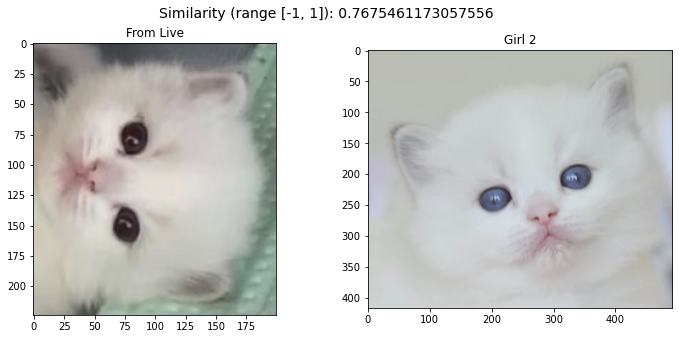

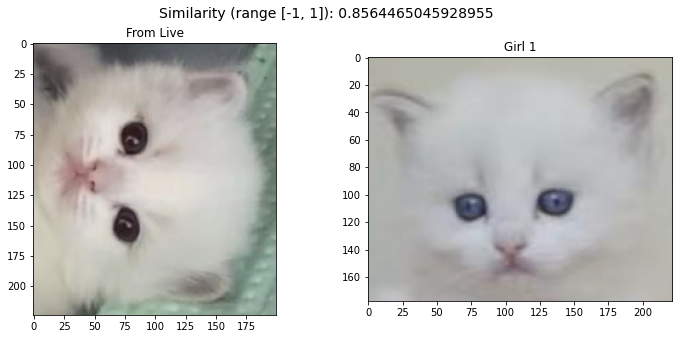

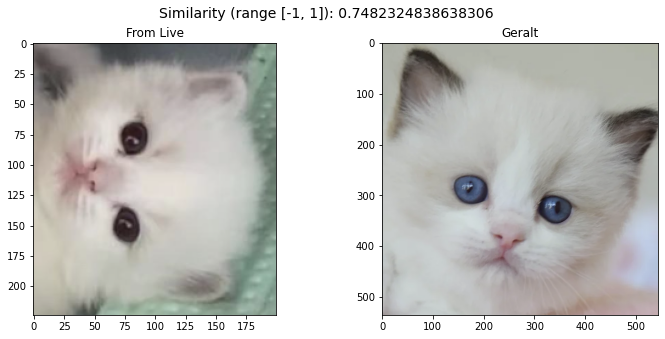

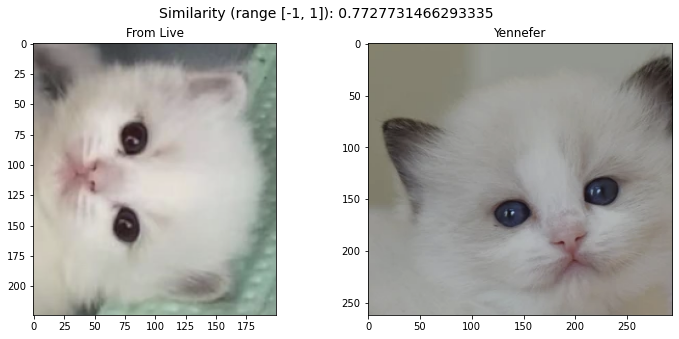

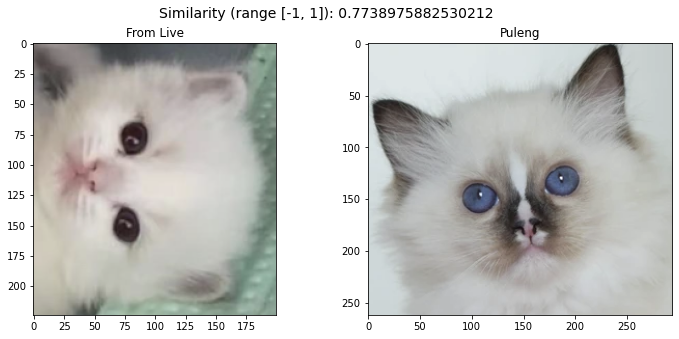

In [13]:
REF = 'ref3.png'
compare_list = {
    'girl2.png': 'Girl 2',
    'girl1.png': 'Girl 1',
    'adv_sample0.png': 'Geralt',
    'adv_sample1.png': 'Yennefer', 
    'adv_sample2.png': 'Puleng'
}

check_sim(REF, compare_list, ref_name='From Live')

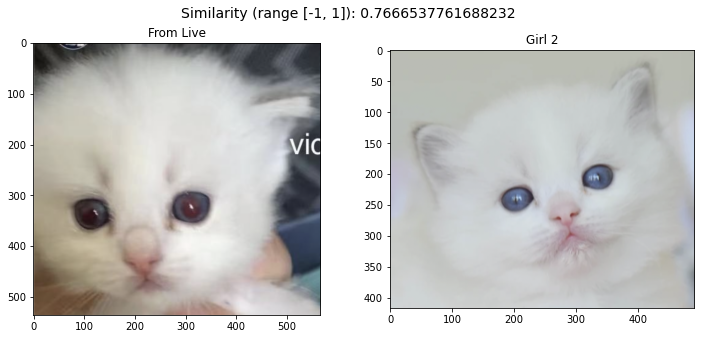

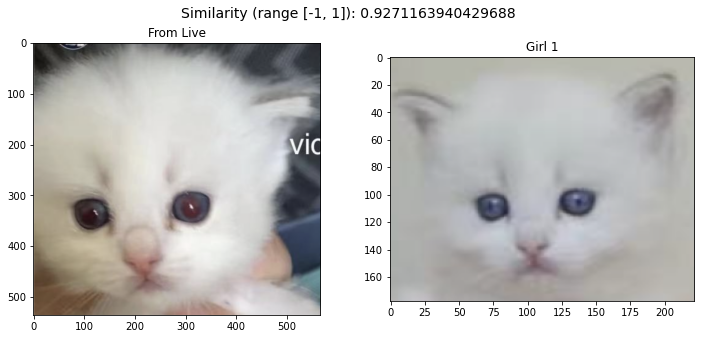

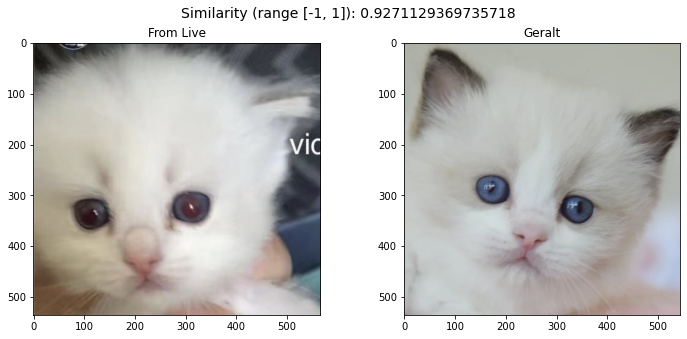

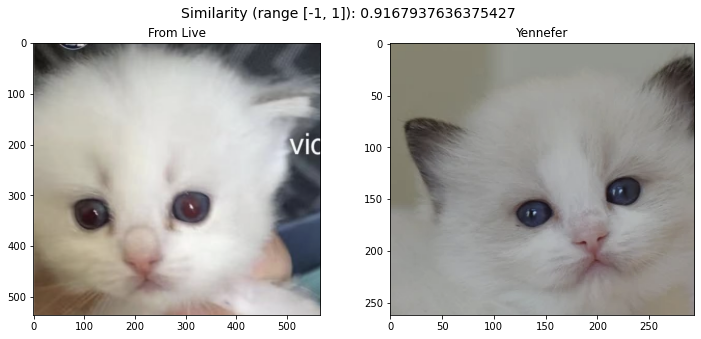

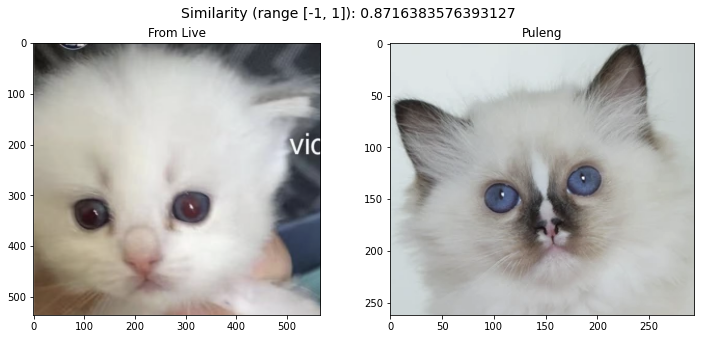

In [14]:
REF = 'live_2.png'
compare_list = {
    'girl2.png': 'Girl 2',
    'girl1.png': 'Girl 1',
    'adv_sample0.png': 'Geralt',
    'adv_sample1.png': 'Yennefer', 
    'adv_sample2.png': 'Puleng'
}

check_sim(REF, compare_list, ref_name='From Live')